In [252]:
#去除脸部图片的白色标签
import os
import os.path
import sys
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import cv2
import hashlib
import random

In [253]:
def imshow(img):
    s=img.shape
    if len(s)>2:
        b,g,r=cv2.split(img)
        img=cv2.merge([r,g,b])
    else:
        img=cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    plt.imshow(img)
    plt.show()

In [254]:
def label_and_rect_s(im,lower,upper):
    #hsv=cv2.cvtColor(im,cv2.COLOR_BGR2HSV)
    #高斯模糊
    GaussianBlurSize=3
    imggauss=cv2.GaussianBlur(im,(11,11),GaussianBlurSize)
    b,g,r=cv2.split(imggauss)
    #白色范围
    #lower=np.array([0,0,200])
    #upper=np.array([180,40,255])
    mask=cv2.inRange(b,lower,upper)
    res=cv2.bitwise_and(imggauss,imggauss,mask=mask)
    #灰度化
    img=cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)
    #二值化
    ret,thresh = cv2.threshold(img,100,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    #闭操作
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(10, 10))
    imgclose = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    #求轮廓
    (contours, _) = cv2.findContours(imgclose.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    #排除
    imgc=imgclose
    con=sorted(contours,key=cv2.contourArea,reverse=True)            
    ret=[]
    for i,c in enumerate(con):
        x,y,w,h=cv2.boundingRect(c)
        if w<90 or w>220:
            continue
        if w<h:
            continue
        ret.append((x,y,w,h))

    if len(ret) == 0:
        return None
    #从二值化原图中取各轮廓中均值最大的一个    
    #val=[]
    #for i,v in enumerate(ret):
    #    x,y,w,h=v
    #    rect=im[y:y+h,x:x+w]
    #    mean=np.mean(rect)
    #    val.append((mean,v))
    #val=sorted(val,reverse=True)
    #roi=val[0][1]
    px=random.randint(1,im.shape[1]-1)
    py=random.randint(1,im.shape[0]-1)
    imgrect = im.copy()    
    for i,v in enumerate(ret):
        x,y,w,h=v
        b,g,r=imgrect[py][px]    
        cv2.rectangle(imgrect,(x,y),(x+w,y+h),(int(b),int(g),int(r)),-1)
    return imgrect

In [255]:
def label_and_rect_m(im,lower,upper):
    hsv=cv2.cvtColor(im,cv2.COLOR_BGR2HSV)
    #高斯模糊
    GaussianBlurSize=3
    imggauss=cv2.GaussianBlur(im,(11,11),GaussianBlurSize)
    mask=cv2.inRange(hsv,lower,upper)
    res=cv2.bitwise_and(imggauss,imggauss,mask=mask)
    #灰度化
    img=cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)
    #二值化
    ret,thresh = cv2.threshold(img,100,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    #闭操作
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(10, 10))
    imgclose = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    #求轮廓
    (contours, _) = cv2.findContours(imgclose.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    #排除
    imgc=imgclose
    con=sorted(contours,key=cv2.contourArea,reverse=True)            
    ret=[]
    for i,c in enumerate(con):
        x,y,w,h=cv2.boundingRect(c)
        if w<90 or w>220:
            continue
        if w<h:
            continue
        ret.append((x,y,w,h))

    if len(ret) == 0:
        return None
    #从二值化原图中取各轮廓中均值最大的一个    
    #val=[]
    #for i,v in enumerate(ret):
    #    x,y,w,h=v
    #    rect=im[y:y+h,x:x+w]
    #    mean=np.mean(rect)
    #    val.append((mean,v))
    #val=sorted(val,reverse=True)
    #roi=val[0][1]
    px=random.randint(1,im.shape[1]-1)
    py=random.randint(1,im.shape[0]-1)
    imgrect = im.copy()    
    for i,v in enumerate(ret):
        x,y,w,h=v
        b,g,r=imgrect[py][px]    
        cv2.rectangle(imgrect,(x,y),(x+w,y+h),(int(b),int(g),int(r)),-1)
    return imgrect

In [256]:
#调试label_and_rect
#im=cv2.imread('/home/wang/git/nppic/data_eva_1/heqingsezhi/ture/65.jpg')
#imshow(label_and_rect(im))

In [257]:
dict1={'taitianzhi': '5bbdb707', 'false': '6f691f7e', 'heqingsezhi': 'bf81bd1f', 'huangheban': '0151f6ac', 'sezhi': 'a2683c1f', 'queban': 'e598ef8b', 'ture': '85ad5a4c', 'riguangxingheizhi': '13e9e528', 'kafeiban': '3976fbec'}
dict2={'3976fbec': 'kafeiban', '6f691f7e': 'false', '13e9e528': 'riguangxingheizhi', 'bf81bd1f': 'heqingsezhi', '0151f6ac': 'huangheban', '5bbdb707': 'taitianzhi', 'e598ef8b': 'queban', '85ad5a4c': 'ture', 'a2683c1f': 'sezhi'}
#目录名编码和反编码
def get_class_torf_hash(jpgpath):  #path: xxx/yyy/zzz/classname/trueorfalse/
    #apath=os.path.split(jpgpath)[0]
    #print apath
    classname=jpgpath.split('/')
    cname=classname[len(classname)-2]
    torf=classname[len(classname)-1]
    return dict1[cname],dict1[torf]

def get_name_from_hash(hashcode):
    return dict2[hashcode]

In [258]:
SOURCEPATH='/home/wang/git/nppic/data_eva_1/'         #存放分类图片
OUTPUTPATH='/home/wang/git/nppic/data_eva_1_out/'  #混合存放将分类图片盖掉标签，文件名包含分类和TF信息
OUTNOTPATH='/home/wang/git/nppic/data_eva_1_not'   #暂存找不到标签位置的
RESTOREPATH='/home/wang/git/nppic/data_eva_1_restore/'#将文件名包含编码分类和TF信息的文件，根据文件名恢复分类
#白色
wlower=np.array([0,0,200])
wupper=np.array([180,40,255])
#青色
qlower=np.array([78,43,46]) 
qupper=np.array([99,255,255])
#混合图片
err=0
cnt=0
for parent,dirnames,filenames in os.walk(SOURCEPATH):
    for fname in filenames:
        if fname.endswith('.jpg')==False and fname.endswith('.JPG')==False:
            continue
        im=cv2.imread(os.path.join(parent,fname))            
        classhash,torfhash=get_class_torf_hash(parent)
        f=fname.split('.')
        newfname='{}-{}-{}.jpg'.format(f[0],classhash,torfhash)
        newpathname=os.path.join(OUTPUTPATH,newfname)

        imr= label_and_rect_s(im,185,255)  #蓝色通道
        if imr==None:
            imr= label_and_rect_m(im.copy(),wlower,wupper)  #多通道白色
        if imr==None:
            imr= label_and_rect_m(im.copy(),qlower,qupper)  #多通道青色
        cnt=cnt+1
        if imr==None:
            print "{} has no roi".format(os.path.join(parent,fname))
            err=err+1
            newpathname=os.path.join(OUTNOTPATH,newfname)
            cv2.imwrite(newpathname,im)
            continue
        cv2.imwrite(newpathname,imr)
print "all: {}, err: {}".format(cnt,err)
print 'over'

/home/wang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:25: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/home/wang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:27: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/home/wang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:30: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


/home/wang/git/nppic/data_eva_1/taitianzhi/ture/429.jpg has no roi
/home/wang/git/nppic/data_eva_1/taitianzhi/ture/149.jpg has no roi
/home/wang/git/nppic/data_eva_1/taitianzhi/ture/362.jpg has no roi
/home/wang/git/nppic/data_eva_1/taitianzhi/ture/839.jpg has no roi
/home/wang/git/nppic/data_eva_1/taitianzhi/ture/590.jpg has no roi
/home/wang/git/nppic/data_eva_1/taitianzhi/ture/659.jpg has no roi
/home/wang/git/nppic/data_eva_1/taitianzhi/ture/1122.jpg has no roi
/home/wang/git/nppic/data_eva_1/taitianzhi/ture/742.jpg has no roi
/home/wang/git/nppic/data_eva_1/taitianzhi/ture/168.jpg has no roi
/home/wang/git/nppic/data_eva_1/taitianzhi/ture/397.jpg has no roi
/home/wang/git/nppic/data_eva_1/taitianzhi/ture/1165.jpg has no roi
/home/wang/git/nppic/data_eva_1/taitianzhi/ture/521.jpg has no roi
/home/wang/git/nppic/data_eva_1/taitianzhi/ture/574.jpg has no roi
/home/wang/git/nppic/data_eva_1/heqingsezhi/false/1212.jpg has no roi
/home/wang/git/nppic/data_eva_1/heqingsezhi/false/1056.jp

In [18]:
#测试目录递归
PATH='/home/wang/git/nppic/recu'
#for parent,dirnames,filenames in os.walk(PATH):
#    for fname in filenames:
#        p=fname.split('.')
#        if p[1]=='jpg' or p[1]=='JPG':
#            print parent,fname
#dict={'taitianzhi': '5bbdb707', 'false': '6f691f7e', 'heqingsezhi': 'bf81bd1f', 'huangheban': '0151f6ac', 'sezhi': 'a2683c1f', 'queban': 'e598ef8b', 'ture': '85ad5a4c', 'riguangxingheizhi': '13e9e528', 'kafeiban': '3976fbec'}
#dict={'3976fbec': 'kafeiban', '6f691f7e': 'false', '13e9e528': 'riguangxingheizhi', 'bf81bd1f': 'heqingsezhi', '0151f6ac': 'huangheban', '5bbdb707': 'taitianzhi', 'e598ef8b': 'queban', '85ad5a4c': 'ture', 'a2683c1f': 'sezhi'}
a1=['heqingsezhi','huangheban','kafeiban','queban','riguangxingheizhi','sezhi','taitianzhi','false','ture']
dic1={}
dic2={}
md5=hashlib.md5()
for i,v in enumerate(a1):
    md5.update(v)
    s=md5.hexdigest()
    print s[24:32],v
    dic1[v]=s[24:32]
    dic2[s[24:32]]=v
print dic1,dic2

bf81bd1f heqingsezhi
0151f6ac huangheban
3976fbec kafeiban
e598ef8b queban
13e9e528 riguangxingheizhi
a2683c1f sezhi
5bbdb707 taitianzhi
6f691f7e false
85ad5a4c ture
{'taitianzhi': '5bbdb707', 'false': '6f691f7e', 'heqingsezhi': 'bf81bd1f', 'huangheban': '0151f6ac', 'sezhi': 'a2683c1f', 'queban': 'e598ef8b', 'ture': '85ad5a4c', 'riguangxingheizhi': '13e9e528', 'kafeiban': '3976fbec'} {'3976fbec': 'kafeiban', '6f691f7e': 'false', '13e9e528': 'riguangxingheizhi', 'bf81bd1f': 'heqingsezhi', '0151f6ac': 'huangheban', '5bbdb707': 'taitianzhi', 'e598ef8b': 'queban', '85ad5a4c': 'ture', 'a2683c1f': 'sezhi'}


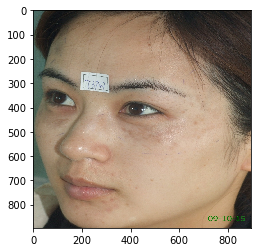

In [175]:
#PICFILE='/home/wang/git/nppic/data_eva_1/heqingsezhi/ture/0.jpg'
PICFILE='/home/wang/git/nppic/data_eva_1/heqingsezhi/ture/65.jpg'
#PICFILE='/home/wang/git/nppic/data_eva_1/sezhi/ture/705.jpg'
#PICFILE='/home/wang/git/nppic/data_eva_1/heqingsezhi/ture/523.jpg'
#PICFILE='/home/wang/git/nppic/data_eva_1/queban/ture/464.jpg'
im=cv2.imread(PICFILE)
imshow(im)

In [117]:
hsv=cv2.cvtColor(im,cv2.COLOR_BGR2HSV)

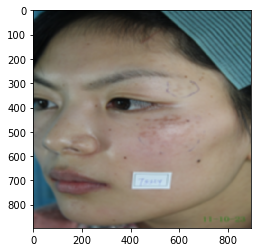

In [118]:
GaussianBlurSize=5
imggauss=cv2.GaussianBlur(im,(11,11),GaussianBlurSize)
imshow(imggauss)

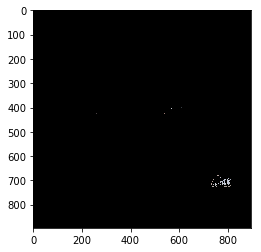

In [63]:
#阈值和掩模
lower=np.array([0,0,221]) 
upper=np.array([180,30,255])
#lower=np.array([78,43,46]) 
#upper=np.array([99,255,255])
mask=cv2.inRange(hsv,lower,upper)
res=cv2.bitwise_and(imggauss,imggauss,mask=mask)
imshow(res)

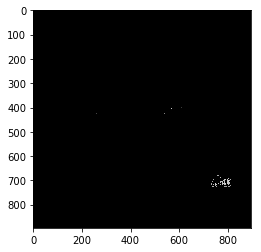

In [64]:
img=cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)
imshow(img)

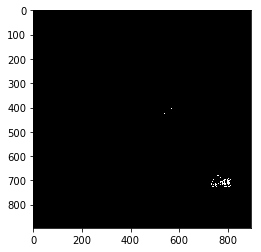

In [65]:
#二值化
ret,thresh = cv2.threshold(img,100,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imshow(thresh)

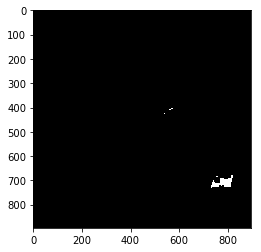

In [66]:
#闭操作
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(10, 10))
imgclose = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
imshow(imgclose)

In [67]:
#轮廓
(contours, _) = cv2.findContours(imgclose.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [68]:
imgc=imgclose
con=sorted(contours,key=cv2.contourArea,reverse=True)            
ret=[]
for i,c in enumerate(con):
    x,y,w,h=cv2.boundingRect(c)
    #正常宽度450左右
    if w<90:
        continue
    #ratio=float(w)/float(h)
    #if ratio<1.35 or ratio>1.55:
    #    continue
    ret.append((x,y,w,h))
print len(ret)
print ret


1
[(732, 680, 91, 50)]


In [69]:
#从二值化中取均值最大的一个
val=[]
for i,v in enumerate(ret):
    x,y,w,h=v
    roi=im[y:y+h,x:x+w]
    mean=np.mean(roi)
    val.append((mean,v))
print val    
val=sorted(val,reverse=True)
roi=val[0][1]
print roi

[(180.25509157509157, (732, 680, 91, 50))]
(732, 680, 91, 50)


33 47 75


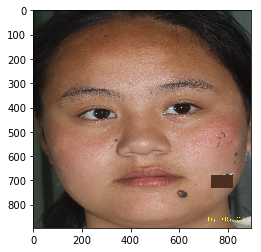

In [73]:
imgrect = im.copy()
px=random.randint(1,im.shape[1])
py=random.randint(1,im.shape[0])

b,g,r=imgrect[py][py]
x,y,w,h=roi
print b,g,r
#cv2.rectangle(imgrect,(x,y),(x+w,y+h),(0,0,255),-1)
cv2.rectangle(imgrect,(x,y),(x+w,y+h),(int(b),int(g),int(r)),-1)
imshow(imgrect)    

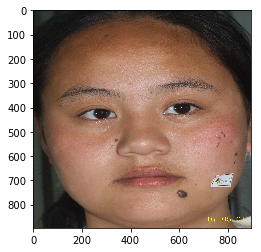

In [224]:
#PICFILE='/home/wang/git/nppic/data_eva_1/heqingsezhi/ture/0.jpg'
#PICFILE='/home/wang/git/nppic/data_eva_1/heqingsezhi/ture/65.jpg'
PICFILE='/home/wang/git/nppic/data_eva_1/sezhi/ture/705.jpg'
#PICFILE='/home/wang/git/nppic/data_eva_1/heqingsezhi/ture/523.jpg'
#PICFILE='/home/wang/git/nppic/data_eva_1/queban/ture/464.jpg'
im=cv2.imread(PICFILE)
imshow(im)

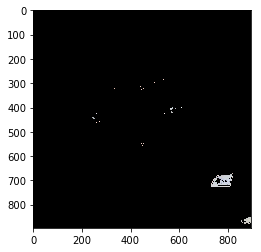

In [225]:
im=im.copy()
#标签色范围
#lower=np.array([0,165])
#upper=np.array([180,40,210])
b,g,r=cv2.split(im)
mask=cv2.inRange(b,185,255)
res=cv2.bitwise_and(im,im,mask=mask)
imshow(res)

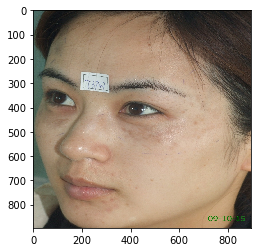

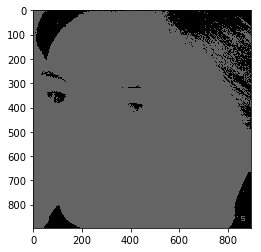

In [216]:
#-----------霍夫变换
img=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY,-1)
_,img=cv2.threshold(img,40,100,cv2.THRESH_BINARY)
type(img)
#ret,thresh = cv2.threshold(img,100,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imshow(img)
#cv2.imshow(img)

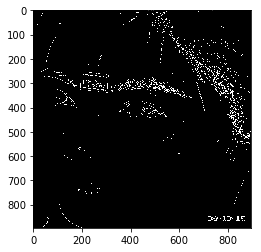

In [195]:
GaussianBlurSize=5
#imggauss=cv2.GaussianBlur(im,(5,5),GaussianBlurSize)
imc=cv2.Canny(img,100,150,apertureSize = 3)
imshow(imc)

In [202]:
lines = cv2.HoughLinesP(imc,1,np.pi/180,118) 
print line.shape
print lines

(4,)
[[[822 360 826 364]
  [615 153 616 154]
  [833 387 836 390]
  ..., 
  [886 509 886 509]
  [510 325 510 325]
  [505 321 505 321]]]


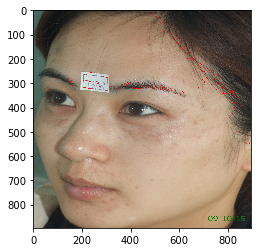

cnt: 978,cntv: 0, cnth: 0


In [203]:
result=im.copy()
cnt=0
cntv=0
cnth=0
    #该直线与第一行的交点
for line in lines[0]:
    rho = line[0] #第一个元素是距离rho
    theta= line[1] #第二个元素是角度theta
    cnt=cnt+1
    #if cnt>5:
       # break
    y1,x1,y2,x2=line
    if abs(y1-y2)>=100:
        cv2.line(result,(y1,x1),(y2,x2),(0,0,255))
    #if  (abs(theta - (np.pi/4. )) < (np.pi/18.)) or (abs(theta - (np.pi*3/4. )) < (np.pi/18.)) : #垂直直线
    #该直线与第一行的交点
        #pt1 = (int(rho/np.cos(theta)),0)
        #该直线与最后一行的焦点
        #pt2 = (int((rho-result.shape[0]*np.sin(theta))/np.cos(theta)),result.shape[0])
        #绘制一条白线
        #cv2.line( result, pt1, pt2, (0,0,255))
        #cntv=cntv+1
    #elif (theta  < (np.pi/18.))  or (abs(theta - (np.pi/2. )) < (np.pi/18.)):#水平直线
        # 该直线与第一列的交点
        #pt1 = (0,int(rho/np.sin(theta)))
        #该直线与最后一列的交点
        #pt2 = (result.shape[1], int((rho-result.shape[1]*np.cos(theta))/np.sin(theta)))
        #绘制一条直线
        #cv2.line(result, pt1, pt2, (0,0,255), 2)
        #cnth=cnth+1
imshow(result)        
print "cnt: {},cntv: {}, cnth: {}".format(cnt,cntv,cnth)